# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [18]:
data = pd.read_csv("weight-height.csv")
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

In [19]:
print(male_df['Height'].mean())
print(male_df['Height'].std())
print(male_df['Weight'].mean())
print(male_df['Weight'].std())
print(female_df['Height'].mean())
print(female_df['Height'].std())
print(female_df['Weight'].mean())
print(female_df['Weight'].std())

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

69.02634590621741
2.863362228660647
187.0206206581932
19.7811545167638
63.70877360342507
2.696284015765054
135.86009300746835
19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

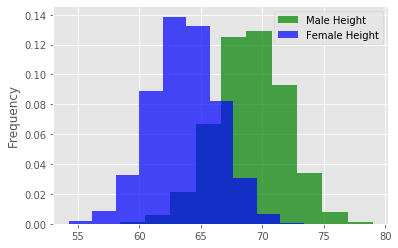

In [31]:
# Your code here
binsize=10
male_df.Height.plot.hist(alpha=0.7, color='green', label='Male Height', density=True)
female_df.Height.plot.hist(alpha=0.7, color='blue', label='Female Height', density=True)
plt.legend()

In [18]:
# Record your observations - are these inline with your personal observations?
#Most common across both genders 65-69 inches
#Male distribution slightly greater
#Most common female 63-66 inches
#Most common male 68-72 inches

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [52]:
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)

(array([0.18901951, 0.18901951, 0.75607804, 1.51215608, 5.10352679,
        4.15842923, 3.02431217, 2.26823413, 1.13411706, 0.56705853]),
 array([-0.2859688 , -0.23306421, -0.18015961, -0.12725502, -0.07435043,
        -0.02144584,  0.03145875,  0.08436334,  0.13726794,  0.19017253,
         0.24307712]),
 <a list of 10 Patch objects>)

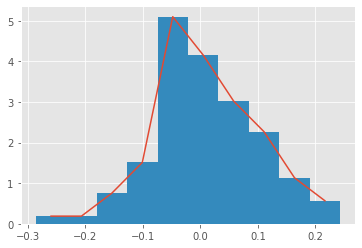

In [59]:
my_hist = np.histogram(s, density=True)
density_x = []
for counter, x in enumerate(my_hist[1]):
    if counter + 1 < len(my_hist[1]):
        density_x.append((x + my_hist[1][counter + 1]) / 2)
plt.plot(density_x, my_hist[0])
plt.hist(s, density=True)

In [63]:
def density(my_array):
    my_hist = np.histogram(my_array, density=True)
    density_x = []
    for counter, x in enumerate(my_hist[1]):
        if counter + 1 < len(my_hist[1]):
            density_x.append((x + my_hist[1][counter + 1]) / 2)
    return density_x, my_hist[0]

In [37]:
#def density(x):
#    n, bins = np.histogram(x, 10, density=1)
#    pdfx = np.zeros(n.size)
#    pdfy = np.zeros(n.size)
#    for k in range(n.size):
#        pdfx[k] = 0.5*(bins[k]+bins[k+1])
#        pdfy[k] = n[k]
#    return pdfx, pdfy
    

# Generate test data and test the function - uncomment to run the test
#np.random.seed(5)
#mu, sigma = 0, 0.1 # mean and standard deviation
#s = np.random.normal(mu, sigma, 100)
#x,y = density(s)
#plt.plot(x,y, label = 'test')
#plt.legend()

## Add overlapping density plots to the histograms plotted earlier

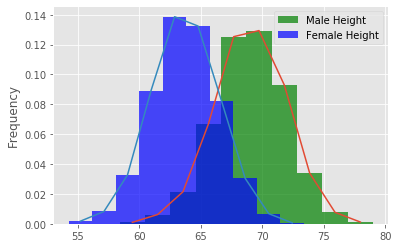

In [70]:
# Your code here 
binsize=10
male_df.Height.plot.hist(alpha=0.7, color='green', label='Male Height', density=True)
female_df.Height.plot.hist(alpha=0.7, color='blue', label='Female Height', density=True)
x_man, y_man = density(male_df['Height'])
plt.plot(x_man, y_man)
x_woman, y_woman = density(female_df['Height'])
plt.plot(x_woman, y_woman)
plt.legend()

## Repeat the above exercise for male and female weights

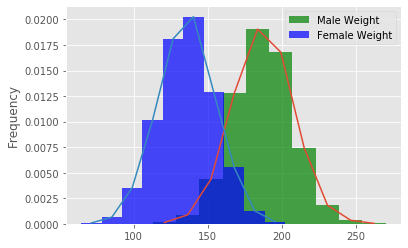

In [71]:
# Your code here
binsize=10
male_df.Weight.plot.hist(alpha=0.7, color='green', label='Male Weight', density=True)
female_df.Weight.plot.hist(alpha=0.7, color='blue', label='Female Weight', density=True)
x_man, y_man = density(male_df['Weight'])
plt.plot(x_man, y_man)
x_woman, y_woman = density(female_df['Weight'])
plt.plot(x_woman, y_woman)
plt.legend()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?
#Males are heavier, highest at about 180-210 lbs.  Females average 125-140 lbs., overlap 150-170 lbs.

## Repeat the above experiments in seaborn and compare with your results

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


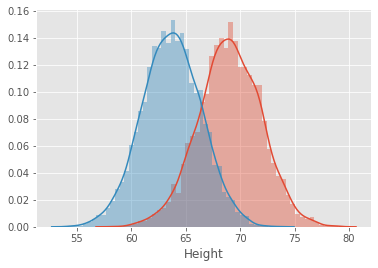

In [72]:
# Code for heights here
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)

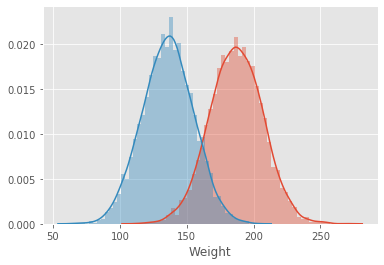

In [73]:
# Code for weights here
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.